In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
df = pd.read_csv('creditcard.csv')
print("Dataset shape:", df.shape)

Dataset shape: (284807, 31)


In [3]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop both
df = df.drop_duplicates()
df = df.dropna()

print("\nDataset shape after cleaning:", df.shape)



Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Number of duplicate rows: 1081

Dataset shape after cleaning: (283726, 31)


Class distribution before undersampling:
Class
0    283253
1       473
Name: count, dtype: int64


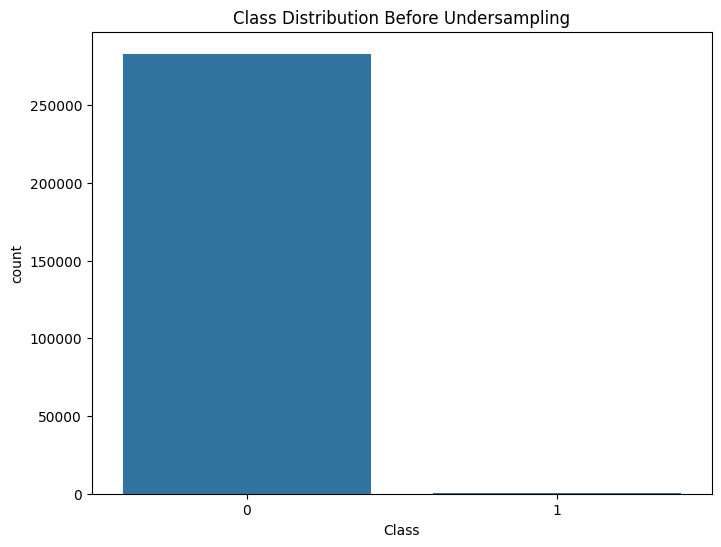

In [4]:
# Separate the dataset into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Count the number of fraud and non-fraud cases
non_fraud_count = len(df[df['Class'] == 0])
fraud_count = len(df[df['Class'] == 1])

# Display the class distribution before undersampling
print("Class distribution before undersampling:")
print(df['Class'].value_counts())

# Plot the class distribution before undersampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution Before Undersampling')
plt.show()



### Using undersampling for the non-fraud cases to balance the dataset:

Class distribution after undersampling:
Class
0    1000
1     473
Name: count, dtype: int64


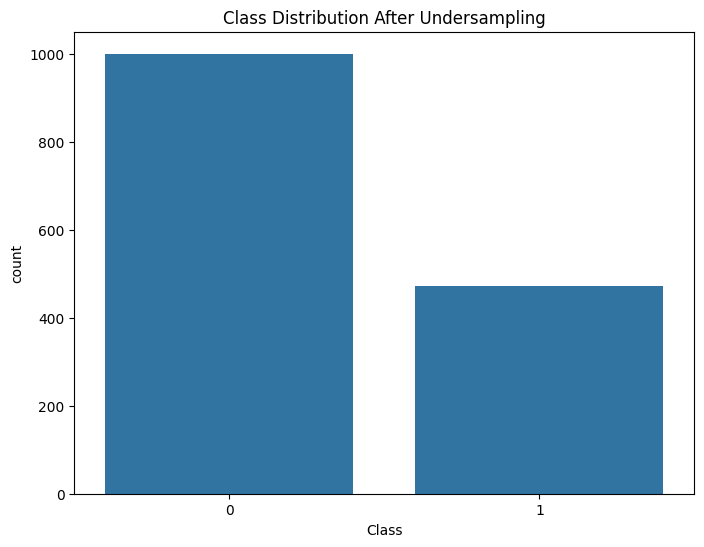

In [5]:
# Undersample the non-fraud cases to 1000 and keep all fraud cases
non_fraud_indices = df[df['Class'] == 0].index
fraud_indices = df[df['Class'] == 1].index

random_non_fraud_indices = np.random.choice(non_fraud_indices, 1000, replace=False)
undersample_indices = np.concatenate([fraud_indices, random_non_fraud_indices])

undersample_df = df.loc[undersample_indices]

# Display the class distribution after undersampling
print("Class distribution after undersampling:")
print(undersample_df['Class'].value_counts())

# Plot the class distribution after undersampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=undersample_df)
plt.title('Class Distribution After Undersampling')
plt.show()

# Update the features and target variable with the undersampled dataset
X_undersample = undersample_df.drop('Class', axis=1)
y_undersample = undersample_df['Class']

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       298
           1       0.99      0.90      0.95       144

    accuracy                           0.97       442
   macro avg       0.97      0.95      0.96       442
weighted avg       0.97      0.97      0.97       442

Accuracy: 0.9660633484162896


In [7]:
# Create an SVM classifier with optimized parameters
from sklearn.svm import SVC

svm = SVC(C=100, kernel='linear', class_weight='balanced')

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("Optimized SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Optimized SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       298
           1       0.98      0.89      0.93       144

    accuracy                           0.96       442
   macro avg       0.97      0.94      0.95       442
weighted avg       0.96      0.96      0.96       442

Accuracy: 0.9592760180995475


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       298
           1       0.99      0.90      0.95       144

    accuracy                           0.97       442
   macro avg       0.97      0.95      0.96       442
weighted avg       0.97      0.97      0.97       442

Accuracy: 0.9660633484162896

Optimized SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       298
           1       0.98      0.89      0.93       144

    accuracy                           0.96       442
   macro avg       0.97      0.94      0.95       442
weighted avg       0.96      0.96      0.96       442

Accuracy: 0.9592760180995475


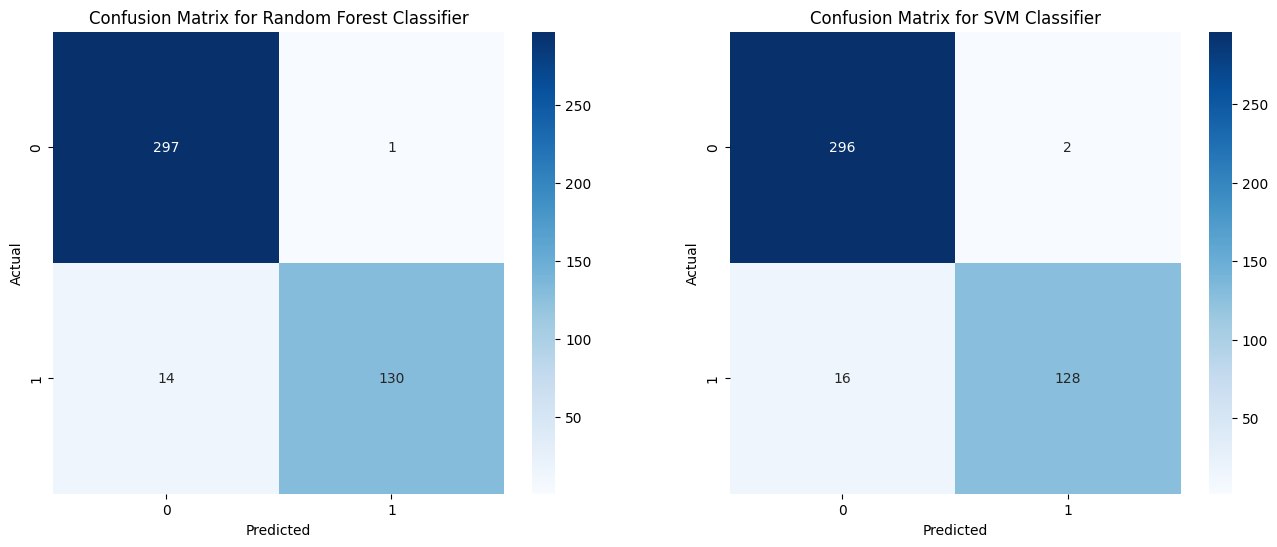

In [8]:

# Compare the results of both models

# Print classification reports and accuracy scores for both models
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nOptimized SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Calculate confusion matrices for both models
conf_matrix_rf = confusion_matrix(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrices side by side for better comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion matrix for Random Forest Classifier
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix for Random Forest Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for SVM Classifier
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix for SVM Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()


Optimized Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       298
           1       0.92      0.91      0.91       144

    accuracy                           0.94       442
   macro avg       0.94      0.93      0.94       442
weighted avg       0.94      0.94      0.94       442

Accuracy: 0.9434389140271493


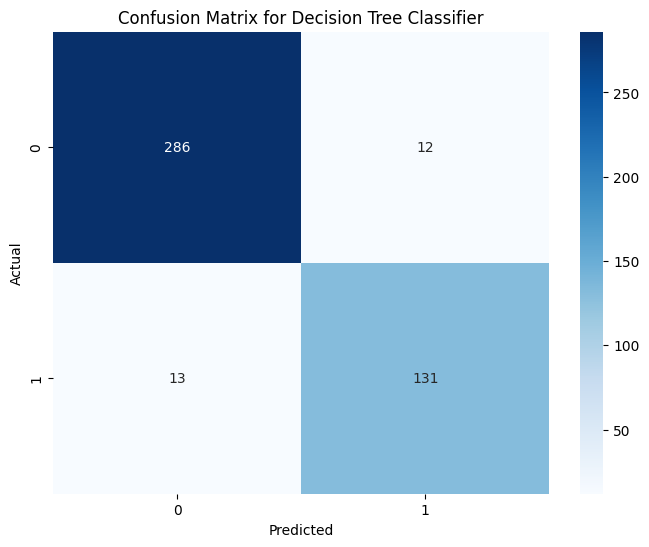

In [9]:
# Create a Decision Tree classifier with optimized parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Predict using the optimized Decision Tree classifier
y_pred_dt = best_dt.predict(X_test)

# Print the classification report and accuracy score
print("Optimized Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Plot confusion matrix for Decision Tree Classifier
fig, ax = plt.subplots(figsize=(8, 6))
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix for Decision Tree Classifier')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       298
           1       0.99      0.90      0.95       144

    accuracy                           0.97       442
   macro avg       0.97      0.95      0.96       442
weighted avg       0.97      0.97      0.97       442

Accuracy: 0.9660633484162896

Optimized SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       298
           1       0.98      0.89      0.93       144

    accuracy                           0.96       442
   macro avg       0.97      0.94      0.95       442
weighted avg       0.96      0.96      0.96       442

Accuracy: 0.9592760180995475

Optimized Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       298
           1       0.92      0.91      0.91       144

    accuracy 

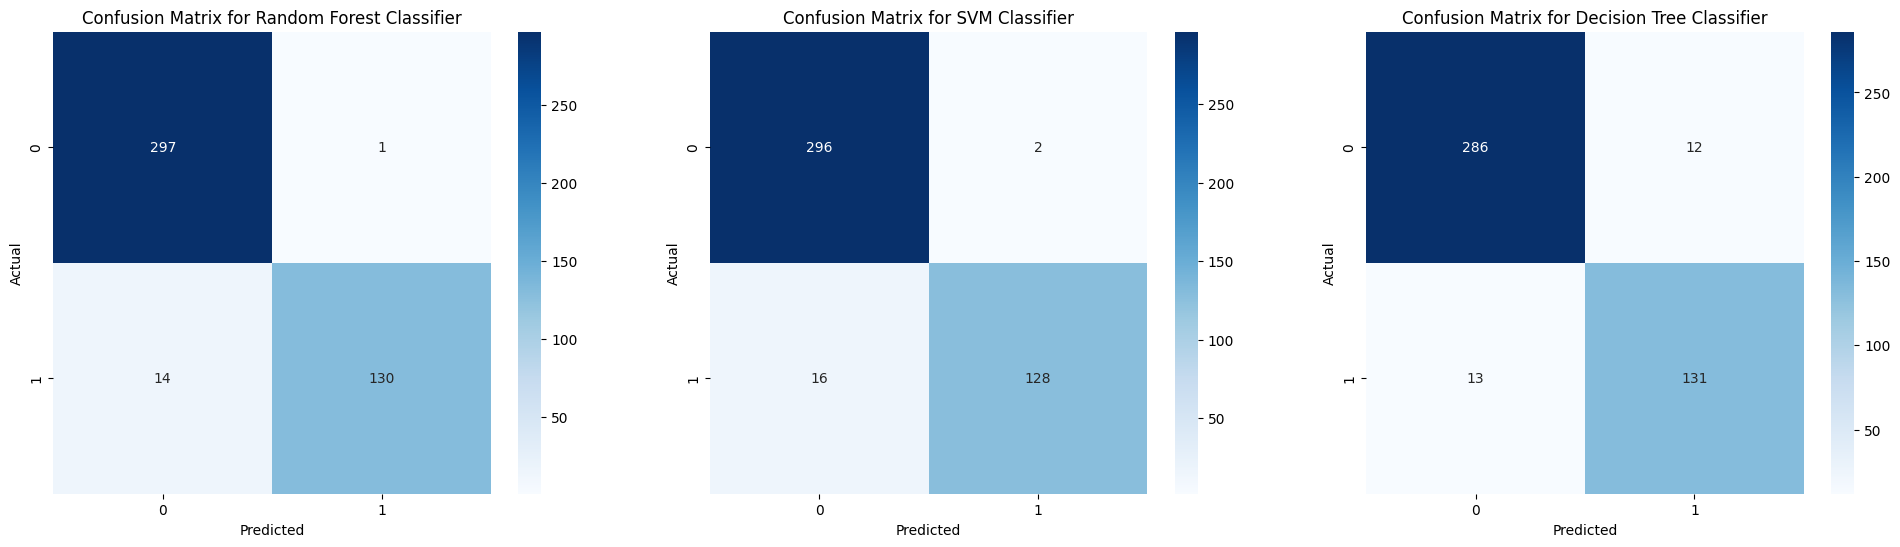

In [10]:
# Print classification reports and accuracy scores for all models
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nOptimized SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nOptimized Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Calculate confusion matrices for all models
conf_matrix_rf = confusion_matrix(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrices side by side for better comparison
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Confusion matrix for Random Forest Classifier
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix for Random Forest Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for SVM Classifier
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix for SVM Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Confusion matrix for Decision Tree Classifier
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Confusion Matrix for Decision Tree Classifier')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()